In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
from aeons.beta import *
figsettings()

In [4]:
name, samples = get_samples('gauss_32')
logXs = samples.logX().values

In [5]:
write_to_txt('data/logXs/gauss_32.txt', logXs)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


1978
0
2425
1
2572
2
2608
3


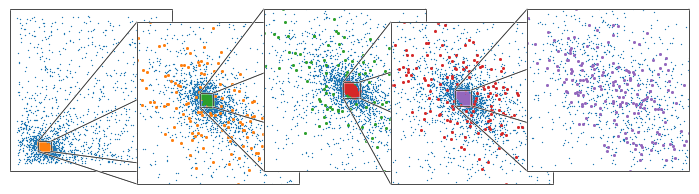

In [209]:
# import lecture_style
from anesthetic.examples.perfect_ns import planck_gaussian
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import patheffects, rcParams
rcParams['path.effects'] = [patheffects.withStroke(linewidth=1, foreground='white')]
from aeons.utils import *

nlive = 100
samples = get_samples('planck_gaussian_100', reduced=False)[1]
ndeads = range(nlive*20, nlive*100, nlive*20)
prev = np.array([20, 40, 40, 40]) * nlive
fig, axes = plt.subplots(1,4, figsize=(7,2))

x = 'omegabh2'
y = 'omegach2'

for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_box_aspect(1)
    points = samples.iloc[: ndeads[i]]
    if i == 0:
        lives = samples.live_points(1)
    else:
        lives = samples.live_points(ndeads[i - 1])
    deads = points[(points[x] < lives[x].max()) * (points[y] < lives[y].max()) * (points[x] > lives[x].min()) * (points[y] > lives[y].min())]
    data = np.array([deads[x].values, deads[y].values]).T
    print(len(data))
    z0 = ax.get_zorder()
    arrays = np.array_split(data, 500)
    for j, d in enumerate(arrays):
        ax.scatter(d[:, 0], d[:, 1], s=0.2, color='C0', zorder=z0 + 1 - 0.0002 * j)
    ax.set_rasterization_zorder(z0 + 1 - 0.0002 * 350)
    print(i)

axes[0].get_children()[-1].get_zorder()
axes[0].set_zorder(10)
axes[0].get_children()[-1].get_zorder()

def get_box(i):
    live = samples.live_points(i)
    xmin = live[x].min()
    xmax = live[x].max()
    ymin = live[y].min()
    ymax = live[y].max()
    return xmin, xmax, ymin, ymax

def inter_axis_line(fig, ax0, ax1, x, y, *args, **kwargs):
    coord0 = fig.transFigure.inverted().transform(ax0.transData.transform([x, y]))
    coord1 = fig.transFigure.inverted().transform(ax1.transData.transform([x, y]))
    return Line2D([coord0[0], coord1[0]], [coord0[1], coord1[1]], transform=fig.transFigure,*args, **kwargs)

def draw_zoom_lines(ax0, ax1, xmin, xmax, ymin, ymax):
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    zorder = max([child.get_zorder() for child in ax0.get_children()] +
                 [ax0.get_zorder()])
    ax1.set_zorder(zorder+2)
    lines = list(fig.lines)
    for x_ in [xmin, xmax]:
        for y_ in [ymin, ymax]:
            lines.append(inter_axis_line(fig, ax0, ax1, x_, y_, color='k',
                                         zorder=zorder+1,
                                         lw=rcParams['axes.linewidth']))
    rect = Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='k',
                     zorder=zorder+1, lw=rcParams['axes.linewidth'])
    ax0.add_patch(rect)
    fig.lines = lines


fig.tight_layout()
fig.canvas.draw()
fig.canvas.flush_events()
shift = 0.065

pos = axes[1].get_position()
pos.x0 -= shift
pos.x1 -= shift
pos.y0 -= shift
pos.y1 -= shift
axes[1].set_position(pos)

pos = axes[2].get_position()
pos.x0 -= shift*2
pos.x1 -= shift*2
axes[2].set_position(pos)

pos = axes[3].get_position()
pos.x0 -= shift*3
pos.x1 -= shift*3
pos.y0 -= shift
pos.y1 -= shift
axes[3].set_position(pos)

ax = fig.add_subplot(1,4,4)
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(samples.iloc[7000:][x], samples.iloc[7000:][y], s=0.2)
axes = np.concatenate([axes, [ax]])

fig.canvas.draw()
fig.canvas.flush_events()
plot_live_points = True

for k, (i, ax0, ax1) in enumerate(zip(ndeads, axes[:-1], axes[1:])):
    if plot_live_points:
        live = samples.live_points(i)
        ax0.scatter(live[x], live[y], s=2, color=f'C{k+1}')
        ax1.scatter(live[x], live[y], s=2, color=f'C{k+1}')
    draw_zoom_lines(ax0, ax1, *get_box(i))

fig.canvas.draw()
fig.canvas.flush_events()
plot_live_points = True

for k, (i, ax0, ax1) in enumerate(zip(ndeads, axes[:-1], axes[1:])):
    if plot_live_points:    
        live = samples.live_points(i)
        ax0.scatter(live[x], live[y], s=2, color=f'C{k+1}')
        ax1.scatter(live[x], live[y], s=2, color=f'C{k+1}')
    draw_zoom_lines(ax0, ax1, *get_box(i))

fig.canvas.draw()
fig.canvas.flush_events()

if plot_live_points:
    filename = 'dead_measure_live.pdf'
else:
    filename = 'dead_measure.pdf'

In [210]:
fig.savefig(filename, bbox_inches='tight')

In [188]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
data = np.array([samples[x].iloc[:2000].values, samples[y].iloc[:2000].values]).T
zorders = 1 - 0.0001 * np.arange(len(data))
for i, point in enumerate(data):
    ax.plot(*point, 'o', ms=.5, color='C0', zorder=zorders[i])
    # ax.scatter(*point, s=0.2, color='C0', zorder=zorders[i])
ax.set_rasterization_zorder(1 - 0.0001 * 0.7 * len(data))
fig.savefig('test.pdf')
print('done')
plt.close()

done


6000


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


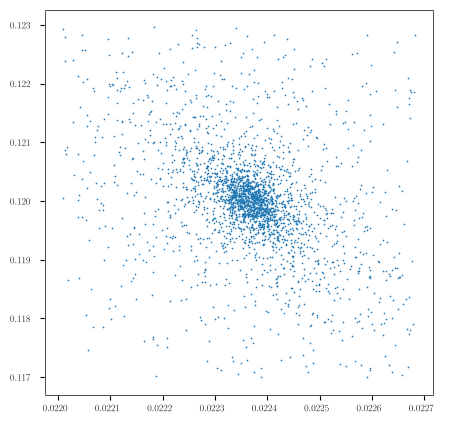

In [90]:
plt.figure(figsize=(5,5))
points = samples.iloc[: ndeads[2]]
lives = samples.live_points(ndeads[1])
print(len(points))
deads = points[(points[x] < lives[x].max()) * (points[y] < lives[y].max()) * (points[x] > lives[x].min()) * (points[y] > lives[y].min())]
plt.scatter(deads[x], deads[y], s=0.5)

In [121]:
zorders = -np.arange(len(deads))
zorders

array([    0,    -1,    -2, ..., -2605, -2606, -2607])

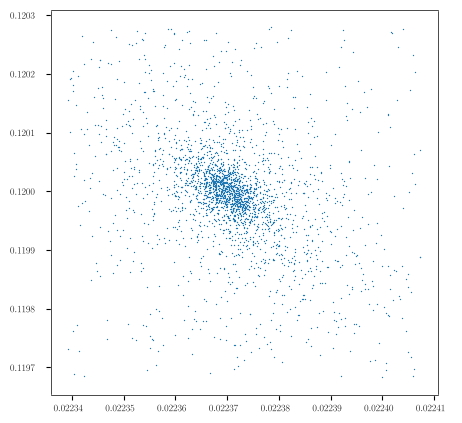

In [125]:
data = np.array([deads[x].values, deads[y].values]).T
fig, ax = plt.subplots(figsize=(5,5))
for i, point in enumerate(data):
    ax.scatter(*point, s=0.2, color='C0', zorder=zorders[i])
ax.set_rasterization_zorder(-1500)

In [127]:
plt.scatter(deads[x], deads[y], s=0.5, zorder=zorders)

Error in callback <function _draw_all_if_interactive at 0x7f2dac88e7a0> (for post_execute):


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 400x200 with 1 Axes>

In [126]:
fig.savefig('test.pdf')

$\log L = \log L_\mathrm{max} - \frac{1}{2\sigma^2} \exp({\frac{2}{d} \log X}) $

$ P(\log X) = \mathrm{const.}$

$ P(\log L) = P(\log X) \frac{\mathrm{d} \log X}{\mathrm{d} \log L} $

In [59]:
ndead = 5000
points = points_at_iteration(samples, ndead)
logXdead = points.logX().iloc[:ndead]

beta = 16/2 / (-points.logL.iloc[:ndead])

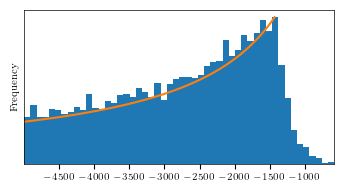

In [57]:
points.logL.drop_weights().plot.hist(bins=50)
plt.plot(points.logL.iloc[:ndead], beta*40000)

/tmp/ipykernel_54281/2363009991.py:19: RuntimeWarning: divide by zero encountered in log
  logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
/tmp/ipykernel_54281/2363009991.py:23: RuntimeWarning: divide by zero encountered in log
  logpdf_live = (d/2-1) * np.log(logLmax - logLlive)


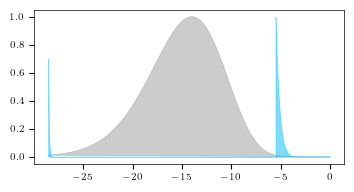

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from aeons.utils import figsettings

figsettings()
fig, ax = plt.subplots()

logLmax = 0
d = 30
n = 1000
avlogL = logLmax-d/2

logLs = logLmax-d/2/np.e
logLdead = np.linspace(logLmax-d/2-np.sqrt(d/2)*3.5, logLs, 1000)
logLlive = np.linspace(logLs,0,1000)
logLall = np.concatenate([logLdead, logLlive])

logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
logpdf -= np.max(logpdf)
ax.fill(logLall, np.exp(logpdf), color='gray', alpha=.4, label='Posterior')

logpdf_live = (d/2-1) * np.log(logLmax - logLlive)
logpdf_live -= np.max(logpdf_live)
ax.fill_between(logLlive, 0, np.exp(logpdf_live), color='deepskyblue', alpha=0.5, label='Live points')

logpdf_dead = d/2 / (-logLdead) 
logpdf_dead -= np.max(logpdf_dead)
ax.fill_between(logLdead, 0, .7*np.exp(logpdf_dead), color='deepskyblue', alpha=0.5, label='Dead points')

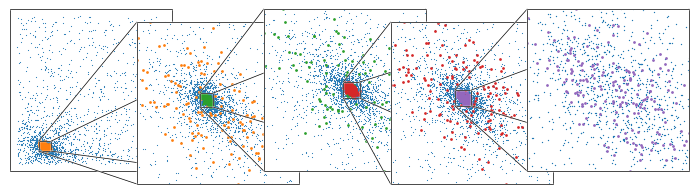

In [49]:
# import lecture_style
from anesthetic.examples.perfect_ns import planck_gaussian
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import patheffects, rcParams
rcParams['path.effects'] = [patheffects.withStroke(linewidth=1, foreground='white')]
from aeons.utils import *

nlive = 100
samples = get_samples('planck_gaussian_100', reduced=False)[1]
ndeads = range(nlive*20, nlive*100, nlive*20)
prev = np.array([20, 40, 40, 40]) * nlive
fig, axes = plt.subplots(1,4, figsize=(7,2))

x = 'omegabh2'
y = 'omegach2'

for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_box_aspect(1)
    points = samples.iloc[ndeads[i] - prev[i] : ndeads[i]]
    ax.scatter(points[x], points[y], s=0.1)
    # ax.scatter(samples[x], samples[y], s=0.1)

axes[0].get_children()[-1].get_zorder()
axes[0].set_zorder(10)
axes[0].get_children()[-1].get_zorder()

def get_box(i):
    live = samples.live_points(i)
    xmin = live[x].min()
    xmax = live[x].max()
    ymin = live[y].min()
    ymax = live[y].max()
    return xmin, xmax, ymin, ymax

def inter_axis_line(fig, ax0, ax1, x, y, *args, **kwargs):
    coord0 = fig.transFigure.inverted().transform(ax0.transData.transform([x, y]))
    coord1 = fig.transFigure.inverted().transform(ax1.transData.transform([x, y]))
    return Line2D([coord0[0], coord1[0]], [coord0[1], coord1[1]], transform=fig.transFigure,*args, **kwargs)

def draw_zoom_lines(ax0, ax1, xmin, xmax, ymin, ymax):
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    zorder = max([child.get_zorder() for child in ax0.get_children()] +
                 [ax0.get_zorder()])
    ax1.set_zorder(zorder+2)
    lines = list(fig.lines)
    for x_ in [xmin, xmax]:
        for y_ in [ymin, ymax]:
            lines.append(inter_axis_line(fig, ax0, ax1, x_, y_, color='k',
                                         zorder=zorder+1,
                                         lw=rcParams['axes.linewidth']))
    rect = Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='k',
                     zorder=zorder+1, lw=rcParams['axes.linewidth'])
    ax0.add_patch(rect)
    fig.lines = lines


fig.tight_layout()
fig.canvas.draw()
fig.canvas.flush_events()
shift = 0.065

pos = axes[1].get_position()
pos.x0 -= shift
pos.x1 -= shift
pos.y0 -= shift
pos.y1 -= shift
axes[1].set_position(pos)

pos = axes[2].get_position()
pos.x0 -= shift*2
pos.x1 -= shift*2
axes[2].set_position(pos)

pos = axes[3].get_position()
pos.x0 -= shift*3
pos.x1 -= shift*3
pos.y0 -= shift
pos.y1 -= shift
axes[3].set_position(pos)

ax = fig.add_subplot(1,4,4)
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(samples[x], samples[y], s=0.2)
axes = np.concatenate([axes, [ax]])

fig.canvas.draw()
fig.canvas.flush_events()
plot_live_points = True

for k, (i, ax0, ax1) in enumerate(zip(ndeads, axes[:-1], axes[1:])):
    if plot_live_points:    
        live = samples.live_points(i)
        ax0.scatter(live[x], live[y], s=2, color=f'C{k+1}')
        ax1.scatter(live[x], live[y], s=2, color=f'C{k+1}')
    draw_zoom_lines(ax0, ax1, *get_box(i))

fig.canvas.draw()
fig.canvas.flush_events()

if plot_live_points:
    filename = 'dead_measure_live.pdf'
else:
    filename = 'dead_measure.pdf'

fig.savefig(filename, transparent=False, bbox_inches='tight')